# Exploratory Data Analisys (EDA) for Mir4 nft market, overview

In this project im going to get some insights about the price in the nft market for Mir4, like the correlation between price and level or price and powerscore, check if there's outliers and remove them if necessary, data comes already clean from the scraping. At the end of this project i'm going to deploy an IA model to predict the price of a nft according to its features.

Refer to https://mir4global.com/ and https://www.xdraco.com/nft/list/ for more information.

I'll work with a csv file scraped with the following script, using Selenium: https://github.com/ia-lozano/webScraping-projects/tree/master/mir4Scraper

The CSV file contains 4 features: <br>

Class: Character's Class <br>
Level: Character's Level <br>
Power: Character's raw powerscore <br>
Price: Price in Wemix (1 Wemix ~ 0.8 USD at the moment of this analisys)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importing Dataset

In [6]:
url = 'https://raw.githubusercontent.com/ia-lozano/mir4_data/refs/heads/master/processed/outlier_free.csv'
df = pd.read_csv(url)

# 2. Working with the Data Frame

In [8]:
df.head(5)

,name,class,level,power,price,date
0,NaN,taoist,85,102142,34,2025-06-22
1,waharaa,sorcerer,81,100378,34,2025-06-22
2,MsHannah01,sorcerer,110,138663,42,2025-06-22
3,4,lancer,91,144116,55,2025-06-22
4,MsHannah01,sorcerer,110,138663,42,2025-06-22


In [9]:
# Checking if the data types are the correct ones to work with
df.dtypes

name     object
class    object
level     int64
power     int64
price     int64
date     object
dtype: object

In [10]:
# Checking how many rows and columns do we have
df.shape

(2913, 6)

# 3. Descriptive Statistics (taking a look)

In [12]:
df.describe()

,level,power,price
count,2913.000000,2913.000000,2913.000000
mean,135.231377,299133.515963,1372.579471
std,15.341690,77820.064276,5812.488107
min,66.000000,100205.000000,34.000000
25%,131.000000,267117.000000,290.000000
50%,141.000000,314802.000000,590.000000
75%,144.000000,350204.000000,1150.000000
max,171.000000,624297.000000,187777.000000


# 4. Drawing plots

# 4.1. Histogram & Distribution Plot

Text(0.5, 1.0, 'Price distribution')

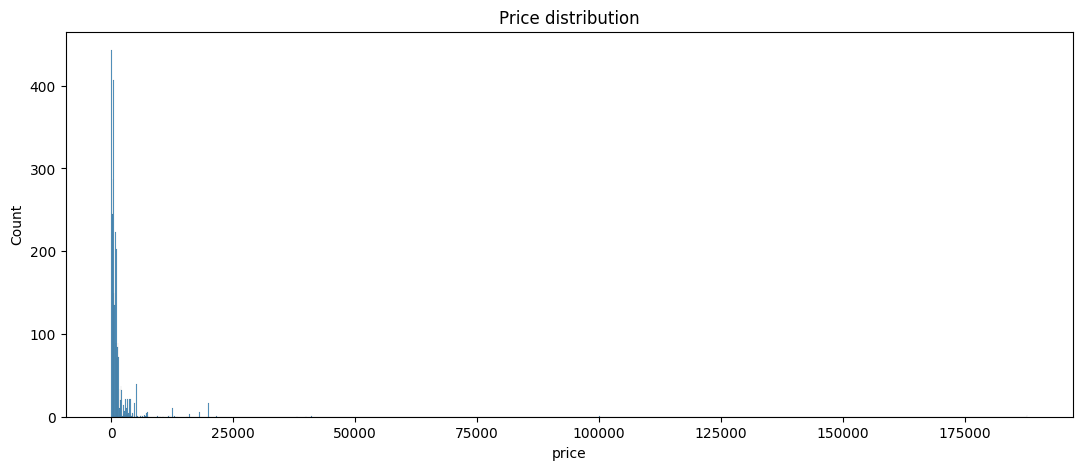

In [15]:
plt.figure(figsize=(13,5))
sns.histplot(df['price'])
plt.title('Price distribution')

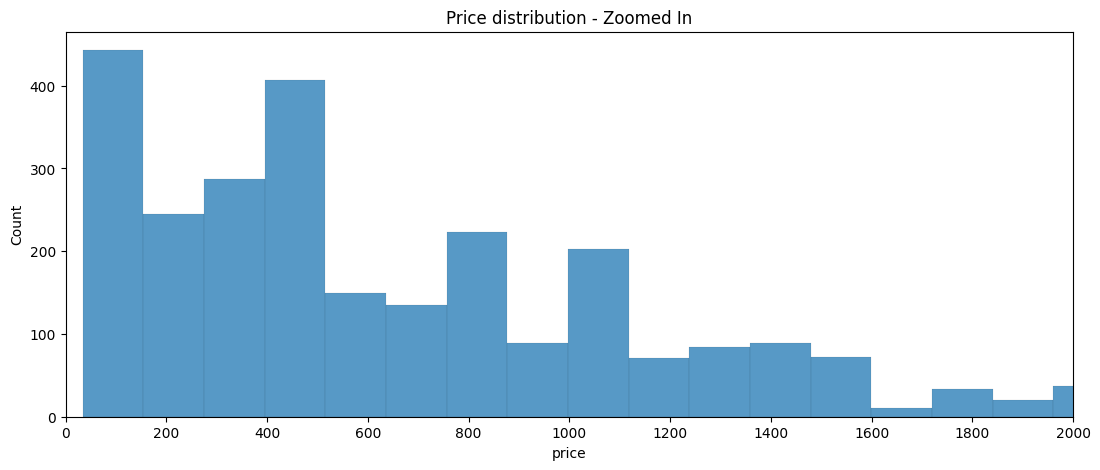

In [16]:
# Zooming in
plt.figure(figsize=(13,5))
sns.histplot(df['price'])

# Adjusting x-axis
plt.xlim(0,2000)
plt.xticks(np.arange(0, 2001, 200))
plt.title('Price distribution - Zoomed In')
plt.show()

In [17]:
# Getting Skew & Kurtosis
print(f'Skew:      {df["price"].skew()} \nKurtosis: {df["price"].kurtosis()}')

Skew:      24.960181048803864 
Kurtosis: 756.35711351304


The data is highly right-skewed and is way higher than 3, the normal distribution kurtosis. which means that there is very expensive nfts listed but most of the nfts have "low" prices, around less than 100 and 400 Wemix.

# 4.2 Scatter Plots

In [20]:
var = 'power'
price_power = pd.concat([df['price'], df[var]], axis=1) # Price vs power table
price_power.head(5)

,price,power
0,34,102142
1,34,100378
2,42,138663
3,55,144116
4,42,138663


<Axes: title={'center': 'Power vs Price'}, xlabel='power', ylabel='price'>

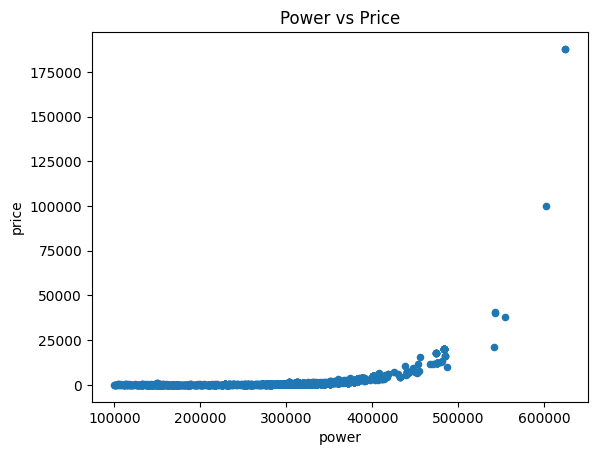

In [21]:
price_power.plot.scatter(x=var, y='price', title='Power vs Price')

It seems that the price is and exponential function of the power, lets take a look at the correlation between Price vs Level

In [23]:
var = 'level'
price_level = pd.concat([df['price'], df[var]], axis=1)
price_level.head(5)

,price,level
0,34,85
1,34,81
2,42,110
3,55,91
4,42,110


<Axes: title={'center': 'Level vs Price'}, xlabel='level', ylabel='price'>

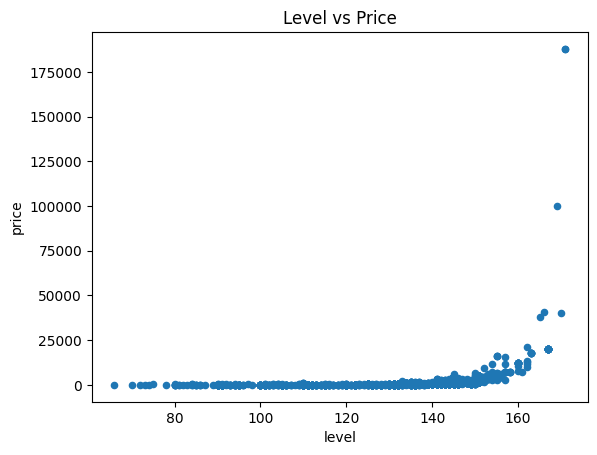

In [24]:
price_level.plot.scatter(x=var, y='price', title='Level vs Price')

The correlation between level and price seems to be also an exponential correlation, makes sense, the more level, the more powerfull the character is.

However, the correlation between power and price seems to be stronger. Actually, a more leveled character doesn't necessary means a more powerful character.

Lets zoom in both charts, for this im going to limit the price from 0 to 2000 wemix and the power and level from 100,000 and 350,000 and from 60 to 130 respectively.

<Axes: title={'center': 'Power vs Price - Zoomed In'}, xlabel='power', ylabel='price'>

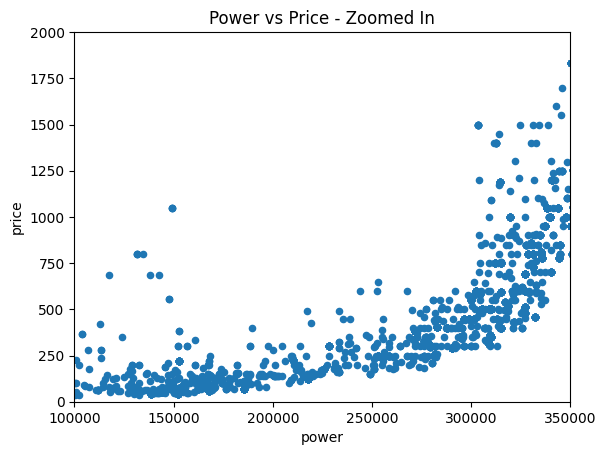

In [26]:
# Zooming in Price vs Power plot
var = 'power'
price_power = pd.concat([df['price'], df[var]], axis=1)
price_power.plot.scatter(x=var, y='price', title='Power vs Price - Zoomed In', ylim=(0,2000), xlim=(100000,350000))

<Axes: title={'center': 'Level vs Price'}, xlabel='level', ylabel='price'>

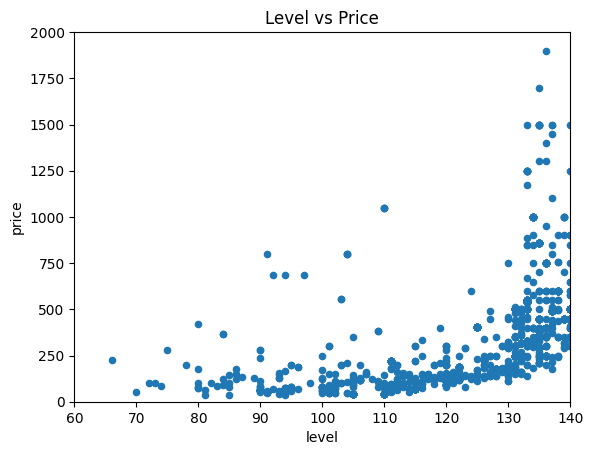

In [27]:
# Zooming in Price vs Level plot
var = 'level'
price_level = pd.concat([df['price'], df[var]], axis=1)
price_level.plot.scatter(x=var, y='price', title='Level vs Price', ylim=(0, 2000), xlim=(60, 140))

In the Level vs Price plot I had to raise the level limit to 150, and even so the correlation seems to be weak. If I wanted to predict the price using a polynomial regression I'd use the Powerscore as a feature.

But... What happens if I want to sell a nft betwen 100,000 and 250,000 powerscore (an achievable free to play character). Lets zoom in even more into the Power vs Price chart.

<Axes: title={'center': 'Power vs Price - Zoomed In'}, xlabel='power', ylabel='price'>

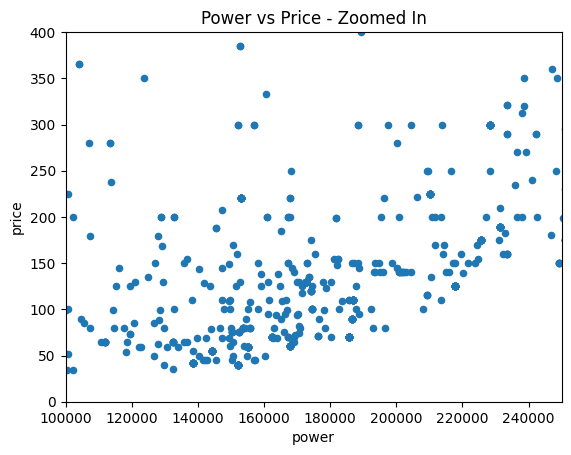

In [29]:
# Zooming in even more...
var = 'power'
price_power = pd.concat([df['price'], df[var]], axis=1)
price_power.plot.scatter(x=var, y='price', title='Power vs Price - Zoomed In', ylim=(0, 400), xlim=(100000, 250000))

<Axes: title={'center': 'Level vs Price - Zoomed In'}, xlabel='level', ylabel='price'>

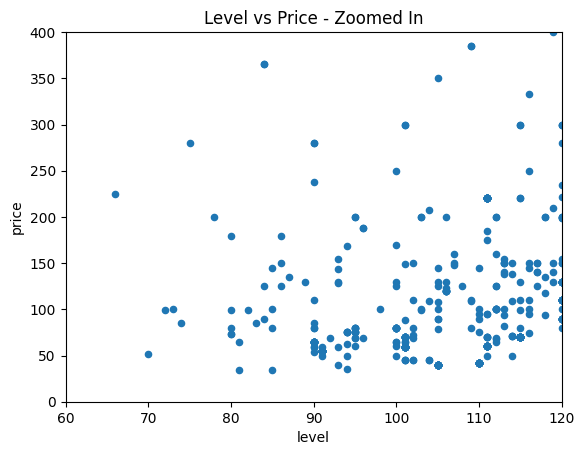

In [30]:
# Zooming even more in Price vs Level plot
var = 'level'
price_level = pd.concat([df['price'], df[var]], axis=1)
price_level.plot.scatter(x=var, y='price', title='Level vs Price - Zoomed In', ylim=(0, 400), xlim=(60,120))

Probably I could use a multiple linear regression to predict the price at lower levels and powerscores. I'll do that later and see how it goes.

# 4.3 Box Plots (Categorical Data)

What about character class? Does it influence the price somehow? <br> lets find out..

In [34]:
# Price and class table
var = 'class'
price_class = pd.concat([df['price'], df[var]], axis=1)
price_class.head(5)

,price,class
0,34,taoist
1,34,sorcerer
2,42,sorcerer
3,55,lancer
4,42,sorcerer


<Axes: xlabel='class', ylabel='price'>

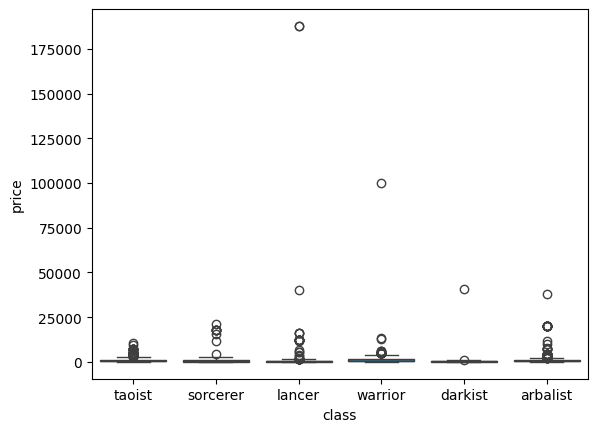

In [35]:
# First glance
sns.boxplot(x=var, y='price', data=price_class)

(np.float64(-0.5), np.float64(5.5), np.float64(0.0), np.float64(2000.0))

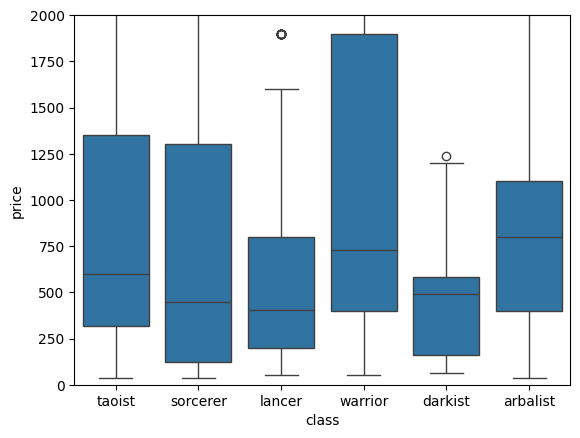

In [36]:
# Zooming in
boxplot = sns.boxplot(x=var, y='price', data=price_class)
boxplot.axis(ymin=0, ymax=2000)

The class seems to have an influence in the price, lancers have the most consistent low price, meanwhile warriors, arbalists and taoists have more disperse price ranges and strong outliers, darkists and sorcerers have more stable price range than warriors, arbalists and taoists, but still have disperse price ranges.  <br>
According to this boxplot, selling a warrior, arbalist or taoist could give you a higher price, which strongly depends on the powerscore as we saw before. So a warrior, taoist or arbalist with high powerscores are the best options to sell.

Definetely the correlation between Price and Power, Level is not linear, as we saw before in the scatter plots section. However, they're still correlated, having the strongest correlation with the powerscore.

# 5. Data Preprocessing for IA regression models

# 5.1 Data cleaning and preprocessing

In [41]:
# From now on we'll treat the Data Frame 'df' as 'dataset'
dataset = df
dataset.head(5)

,name,class,level,power,price,date
0,NaN,taoist,85,102142,34,2025-06-22
1,waharaa,sorcerer,81,100378,34,2025-06-22
2,MsHannah01,sorcerer,110,138663,42,2025-06-22
3,4,lancer,91,144116,55,2025-06-22
4,MsHannah01,sorcerer,110,138663,42,2025-06-22


In [42]:
# Looking for missing data
missing_data = dataset.isnull().sum()
print('Missing data per column\n', missing_data)

Missing data per column
 name     7
class    0
level    0
power    0
price    0
date     0
dtype: int64


In [43]:
# Separating target variable from features, for polynomial regression i will take power only
X = dataset.iloc[:, 3:-2].values
y = dataset.iloc[:, -2].values

In [44]:
print(X)

[[102142]
 [100378]
 [138663]
 ...
 [601923]
 [624297]
 [624297]]


In [45]:
print(y)

[    34     34     42 ... 100000 187777 187777]


# 5.2 Splitting dataset into Train and Test sets

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 6. Polynomial Regression

As we say in the EDA Section, the correlation between power and price seems to be polynomial. Also, the price strongly correlated to power rather than level or class.

Text(0, 0.5, 'Price (Wemix)')

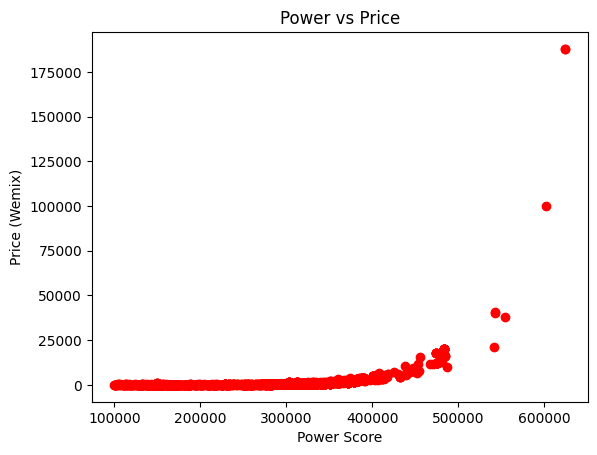

In [50]:
# Visualizing Power vs Price
plt.scatter(X, y, color='red')
plt.title('Power vs Price')
plt.xlabel('Power Score')
plt.ylabel('Price (Wemix)')

In [51]:
# Training Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


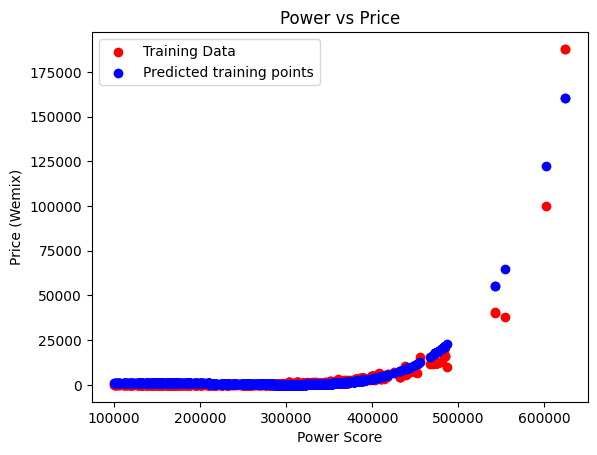

In [52]:
# Plot training points
plt.scatter(X_train, y_train, color='red', label='Training Data')
# Plot Polynomial Regression
y_train_pred = regressor.predict(poly_reg.fit_transform(X_train))
plt.scatter(X_train, y_train_pred, color='blue', label='Predicted training points')
plt.title('Power vs Price')
plt.xlabel('Power Score')
plt.ylabel('Price (Wemix)')
plt.legend()           
plt.show()

# 6.1 Testing Results

In [54]:
# Taking a look at the model using the test set
y_pred_test = regressor.predict(poly_reg.fit_transform(X_test))
# print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1), y_test.reshape(len(y_test),1)),1))

At first glance, performance is not the best, lets test obtain the metrics

In [56]:
# Obtaining performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
# Avg absolute errors between predicted and test values
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error:", round(mae, 2))

# Calculate MSE
# Avg squared errors between predicted and test values
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", round(mse, 2))

# Calculate RMSE
# Squared root of the MSE, which brings the metric back to the same unit as the target variable
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", round(rmse, 2))

# Calculate R2
# Proportion of variance explained by the model, Closer to 1 indicates better fit
r2 = r2_score(y_test, y_pred_test)
print("R-squared:", round(r2, 2))

Mean Absolute Error: 584.04
Mean Squared Error: 2399029.16
Root Mean Squared Error: 1548.88
R-squared: 0.4


The model might seems to be overfitted with a degree 10 Polynomial Regression. However, model predictions make sense even though the error could be high, higher power nfts are exponentially more expensive.

In [58]:
# Getting Polynomial model coefficients
coefficients = regressor.coef_
intercept = regressor.intercept_
intercept

np.float64(1244.0817436495129)

In [59]:
coefficients

array([ 0.00000000e+00,  2.21212349e-34, -1.10709782e-40, -2.86394617e-35,
       -9.57381420e-30, -2.37201248e-24,  6.48611941e-30])

In [98]:
power_value = [[100000]]
predicted_price = regressor.predict(poly_reg.transform(power_value))
print("Predicted Price:", predicted_price[0])

Predicted Price: 1226.8477382731783


# 7. Conclusions

The Power Score of the characters is determinant to define the price, as we saw, Price<br>
grows exponentially with the Power Score, also class might have an influence when defining<br>
prices, Lancer class having consistent low prices, meanwhile Warrior and Arbalist classes have<br>
more disperse prices but they can reach the highest prices among all classes. <br>

Developing a Warrior or Arbalist character with high Power Scores are best options to sell, while<br>
developing a Lancer Class character is the worst option if you want to eventually sell your<br>
character.